## Playing with Geopandas
- I'm using Python3 for this, which for some reason works
- I have to open this notebook via Anaconda Lancher, using the environment I created containing geopandas

In [31]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

# pd.options.display.max_rows = 50

### __Step 1.__ 
  
Get a sense of the shape file, _precincts.shp_, and load  data into **map_data**

In [2]:
map_data = gp.read_file("./rawdata/precincts.shp")

In [3]:
map_data.columns

Index(['DP', 'DPnum', 'DPtype', 'County', 'ZEROPOP', 'BallotType', 'US_House',
       'State_Hous', 'State_Sena', 'County_Cou', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [32]:
map_data.head()

,DP,DPnum,DPtype,County,ZEROPOP,BallotType,US_House,State_Hous,State_Sena,County_Cou,Shape_Leng,Shape_Area,geometry
0,07-03,703,PP,HAWAII,None,CD2-H07-S04-CC9,CD2,H7,S4,CC9,100748.260922,3.433163e+08,"POLYGON ((835411.3768999996 2242169.546499999,..."
1,01-05,105,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,75515.354158,1.434849e+08,"POLYGON ((906512.0015000002 2203194.6965, 9065..."
2,01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,141411.346571,3.771898e+08,"POLYGON ((845037.4576000003 2235503.49, 845078..."
3,01-02,102,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,69022.641881,2.207124e+08,"POLYGON ((875571.6487999996 2224060.138800001,..."
4,01-06,106,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,72825.893157,1.087545e+08,"POLYGON ((905373.9034000002 2196794.262499999,..."


### __Step 2.__
  
Plot the map

Text(0.5,1,'Hawaii Counties')

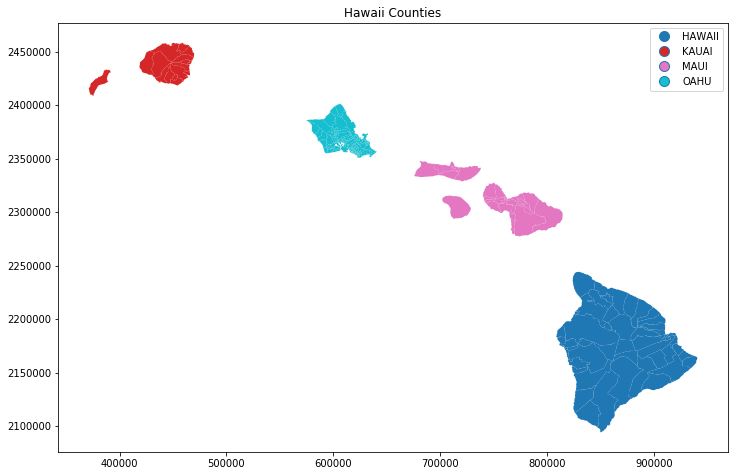

In [8]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
map_data.plot(column='County', legend=True, ax=ax)
ax.set_axis_on()
ax.set_title('Hawaii Counties')


In [29]:
# get a subset of OAHU

map_oahu = map_data[map_data['County']=='OAHU']
map_oahu.head()

,DP,DPnum,DPtype,County,ZEROPOP,BallotType,US_House,State_Hous,State_Sena,County_Cou,Shape_Leng,Shape_Area,geometry
102,17-01,1701,PP,OAHU,None,CD1-H17-S25-CC4,CD1,H17,S25,CC4,21556.712202,7.769463e+06,"POLYGON ((640118.2456 2356929.160700001, 64012..."
103,17-02,1702,PP,OAHU,None,CD1-H17-S25-CC4,CD1,H17,S25,CC4,14253.484569,4.166595e+06,"POLYGON ((635133.0470000003 2354599.646600001,..."
104,17-03,1703,PP,OAHU,None,CD1-H17-S09-CC4,CD1,H17,S9,CC4,16964.251950,9.118685e+06,"POLYGON ((636665.8814000003 2358175.607799999,..."
105,17-04,1704,PP,OAHU,None,CD1-H17-S09-CC4,CD1,H17,S9,CC4,10326.833881,4.819473e+06,"POLYGON ((635471.9507999998 2357833.7699, 6354..."
106,19-01,1901,PP,OAHU,None,CD1-H19-S09-CC4,CD1,H19,S9,CC4,21925.535906,6.397481e+06,"POLYGON ((626066.4594000001 2353741.324200001,..."


### __Step 3.__ 
  
Try open the election result files, _statewideprecinctdetail.txt_, and _summary.txt_
Then, explore these files to see if any columns can be merged into the shp file

In [30]:
df_det = pd.read_csv('./rawdata/statewideprecintdetail.txt',skiprows=0)
df_det.head()


,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes
0,01-01,NaN,1,2863,1067,1,2,U.S. Senator - D,NaN,7,"HIRONO, Mazie K.",NaN,C,483,67,265
1,01-01,NaN,1,2863,1067,1,3,U.S. Senator - N,NaN,8,"REYES, Arturo Pacheco",NaN,C,1,0,0
2,01-01,NaN,1,2863,1067,1,3,U.S. Senator - N,NaN,9,"HAVERTY, Charles (Charlie)",NaN,C,2,0,2
3,01-01,NaN,1,2863,1067,1,3,U.S. Senator - N,NaN,10,"MAERTENS, Matthew K.",NaN,C,1,0,1
4,01-01,NaN,1,2863,1067,1,4,U.S. Senator - R,NaN,11,"ANDERSON, Consuelo",NaN,C,10,3,7


In [11]:
df_summ = pd.read_csv('./rawdata/summary.txt')
df_summ.head()


,Contest ID,Contest Title,Contest Seq Nbr,Contest Type,Contest Party,Absentee Mail Blank Votes,Absentee Walk-in Blank Votes,Election Blank Votes,Absentee Mail Over Votes,Absentee Walk-in Over Votes,...,Total Precincts,Counted Precincts,Candidate ID,Candidate Name,Candidate Seq Nbr,Candidate Party,Absentee Mail Votes,Absentee Walk-in Votes,Election Votes,Total Votes
0,2,U.S. Senator - D,2,OF,NaN,24424,3164,18565,99,0,...,249,249,7,"HIRONO, Mazie K.",1,NaN,114141,14435,73103,201679
1,3,U.S. Senator - N,3,OF,NaN,599,42,257,2,0,...,249,249,8,"REYES, Arturo Pacheco",3,NaN,240,15,186,441
2,3,U.S. Senator - N,3,OF,NaN,599,42,257,2,0,...,249,249,9,"HAVERTY, Charles (Charlie)",1,NaN,256,17,143,416
3,3,U.S. Senator - N,3,OF,NaN,599,42,257,2,0,...,249,249,10,"MAERTENS, Matthew K.",2,NaN,195,10,98,303
4,4,U.S. Senator - R,4,OF,NaN,3197,309,2230,24,0,...,249,249,15,"CURTIS, Ron",3,NaN,3583,315,2472,6370


In [51]:
df_det.groupby('Contest_title').describe()


Absentee_votes                          \
                                            count        mean         std   
Contest_title                                                               
At-Large Trustee                           3735.0   61.793039   71.117401   
Councilmember                               384.0  113.799479  119.217001   
Councilmember (Kahului)                     102.0  147.343137  120.814275   
Councilmember (Makawao-Haiku-Paia)          102.0  148.862745  169.711172   
Councilmember (Molokai)                     102.0  137.029412  145.036455   
Councilmember (West Maui)                   102.0  133.686275  119.974583   
Councilmember, Dist 1                        16.0  140.312500  133.140386   
Councilmember, Dist 2                         8.0  420.750000  405.125642   
Councilmember, Dist 3                         5.0  491.200000  462.532918   
Councilmember, Dist 4                         8.0  304.000000  231.596324   
Councilmember, Dist 5                         9.0  233.000000  179.541778   
Councilmember, Dist 6                        24.0   88.375000  116.803742   
Councilmember, Dist 7                        16.0  115.312500   80.149626   
Councilmember, Dist 8                         4.0  389.750000  149.281334   
Councilmember, Dist 9                         6.0  396.833333   82.920243   
Councilmember, Dist II                       56.0  127.750000  184.277681   
Councilmember, Dist IV                       68.0  226.470588  228.512351   
Councilmember, Dist VI                       84.0  151.416667  172.408538   
Governor - D                               1494.0   90.675368  166.119820   
Governor - G                                249.0    1.036145    1.326946   
Governor - N                                747.0    0.903614    1.386965   
Governor - R                                747.0   21.617135   23.250025   
Lieutenant Governor - D                    1245.0  106.975100  116.381518   
Lieutenant Governor - G                     249.0    1.032129    1.370400   
Lieutenant Governor - N                     498.0    1.267068    1.576666   
...                                           ...         ...         ...   
State Senator, Dist 17 - R                    8.0   46.125000   28.251106   
State Senator, Dist 18 - D                    8.0  663.375000  260.961923   
State Senator, Dist 18 - R                   16.0   48.562500   27.589778   
State Senator, Dist 19 Vacancy - D           21.0  135.857143  153.212038   
State Senator, Dist 19 Vacancy - R            7.0   89.857143   65.925282   
State Senator, Dist 21 - D                   10.0  213.300000  215.964014   
State Senator, Dist 21 - R                    5.0  108.600000   52.127728   
State Senator, Dist 23 - D                   18.0  143.944444   91.409532   
State Senator, Dist 24 - D                   22.0  318.000000  193.098297   
State Senator, Dist 3 - D                    24.0  183.541667  104.635175   
State Senator, Dist 3 - L                    12.0    1.000000    1.279204   
State Senator, Dist 4 - D                    24.0  196.416667  114.197737   
State Senator, Dist 6 - D                    18.0  177.055556   86.511116   
State Senator, Dist 6 - G                     9.0    1.333333    1.322876   
State Senator, Dist 7 - D                    45.0  116.177778  166.024956   
U.S. Representative, Dist I - D             805.0   87.731677  134.097546   
U.S. Representative, Dist I - G             115.0    1.026087    1.252792   
U.S. Representative, Dist I - L             115.0    0.782609    1.129995   
U.S. Representative, Dist I - N             230.0    1.217391    1.517195   
U.S. Representative, Dist I - R             230.0   30.708696   33.144087   
U.S. Representative, Dist II - D            402.0  146.932836  211.008144   
U.S. Representative, Dist II - R            134.0   46.089552   35.812054   
U.S. Senator - D                            249.0  458.389558  324.708500   
U.S. Senator - N               

### Step 4.
  
See if any of the columns in  __map_data__ is matched with those in __df__'s

In [12]:
map_data.columns


Index(['DP', 'DPnum', 'DPtype', 'County', 'ZEROPOP', 'BallotType', 'US_House',
       'State_Hous', 'State_Sena', 'County_Cou', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [13]:
df_det.columns

Index(['Precinct_Name', 'Split_Name', 'precinct_splitId', 'Reg_voters',
       'Ballots', 'Reporting', 'Contest_id', 'Contest_title', 'Contest_party',
       'Choice_id', 'Candidate_name', 'Choice_party', 'Candidate_Type',
       'Absentee_votes', 'Early_votes', 'Election_Votes'],
      dtype='object')

In [16]:
# See if there's any match

match = [each for each in map_data.columns if each in df_det.columns]
match

[]

In [17]:
# See if there's any match

match = [each for each in map_data.columns if each in df_summ.columns]
match

[]

### Ok, so there's no match of column names... __:disappointed:__  
  
However, it seems like **'Precinct_Name'** in **def_det** contains the the same info as **'DP'** in **map_data**  
- Turns out **DP** stands for **District-Precinct**, so let's try to merge 


In [36]:
# merging dataFrames: map_data with df_det

merged = map_data.set_index('DP').join(df_det.set_index('Precinct_Name'))
merged['Total_votes'] = merged.Early_votes + merged.Absentee_votes + merged.Election_Votes
merged.head()

,DPnum,DPtype,County,ZEROPOP,BallotType,US_House,State_Hous,State_Sena,County_Cou,Shape_Leng,...,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes,Total_votes
01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,141411.346571,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,483.0,67.0,265.0,815.0
01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,141411.346571,...,U.S. Senator - N,NaN,8.0,"REYES, Arturo Pacheco",NaN,C,1.0,0.0,0.0,1.0
01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,141411.346571,...,U.S. Senator - N,NaN,9.0,"HAVERTY, Charles (Charlie)",NaN,C,2.0,0.0,2.0,4.0
01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,141411.346571,...,U.S. Senator - N,NaN,10.0,"MAERTENS, Matthew K.",NaN,C,1.0,0.0,1.0,2.0
01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,141411.346571,...,U.S. Senator - R,NaN,11.0,"ANDERSON, Consuelo",NaN,C,10.0,3.0,7.0,20.0


In [54]:
title = merged.groupby('Contest_title')
title.describe()

In [75]:
Mazie = merged[merged.Candidate_name == 'HIRONO, Mazie K.']


(249, 28)


,DPnum,DPtype,County,ZEROPOP,BallotType,US_House,State_Hous,State_Sena,County_Cou,Shape_Leng,...,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes,Total_votes
01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,141411.346571,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,483.0,67.0,265.0,815.0
01-02,102,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,69022.641881,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,163.0,21.0,122.0,306.0
01-03,103,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,84913.836425,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,211.0,38.0,128.0,377.0
01-04,104,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,60552.140443,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,49.0,17.0,28.0,94.0
01-05,105,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,75515.354158,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,356.0,54.0,215.0,625.0
01-06,106,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,72825.893157,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,261.0,49.0,147.0,457.0
01-07,107,PP,HAWAII,None,CD2-H01-S01-CC1,CD2,H1,S1,CC1,66435.649705,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,190.0,68.0,156.0,414.0
01-08,108,PP,HAWAII,None,CD2-H01-S01-CC2,CD2,H1,S1,CC2,97642.900121,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,1061.0,190.0,504.0,1755.0
01-09,109,PP,HAWAII,None,CD2-H01-S01-CC2,CD2,H1,S1,CC2,83531.296816,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,410.0,67.0,204.0,681.0
02-01,201,PP,HAWAII,None,CD2-H02-S01-CC2,CD2,H2,S1,CC2,15509.783282,...,U.S. Senator - D,NaN,7.0,"HIRONO, Mazie K.",NaN,C,790.0,165.0,316.0,1271.0


C:\Users\Makana\Anaconda3\envs\geopandas\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\Makana\Anaconda3\envs\geopandas\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\Makana\Anaconda3\envs\geopandas\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


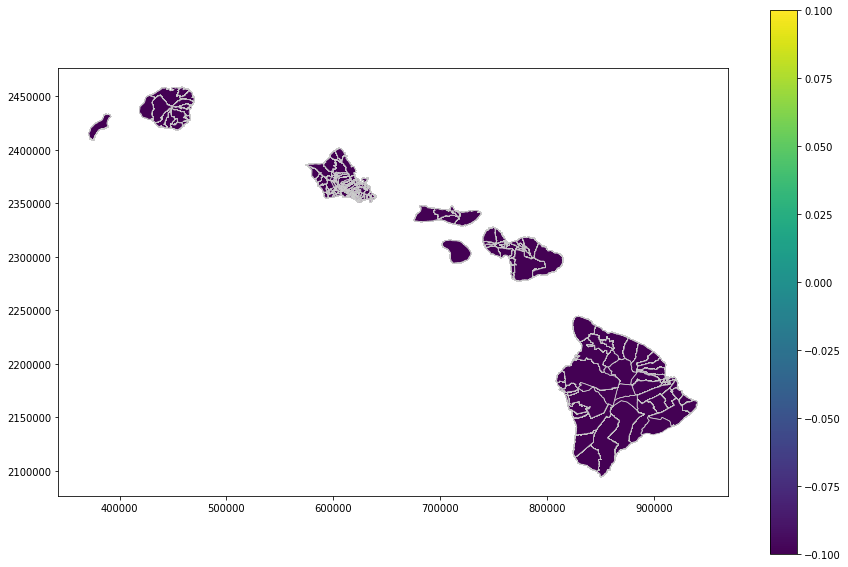

In [74]:
# >>> Mazie Hirono's map of Total

fig,ax = plt.subplots(figsize=(15,10))
merged.plot(column='Total_votes', 
            categorical = False, 
            linewidth=0.8, edgecolor='0.8',
            cmap ='viridis',
            ax=ax, legend=True)
ax.set_title("Mazie Hirono's Total Votes")


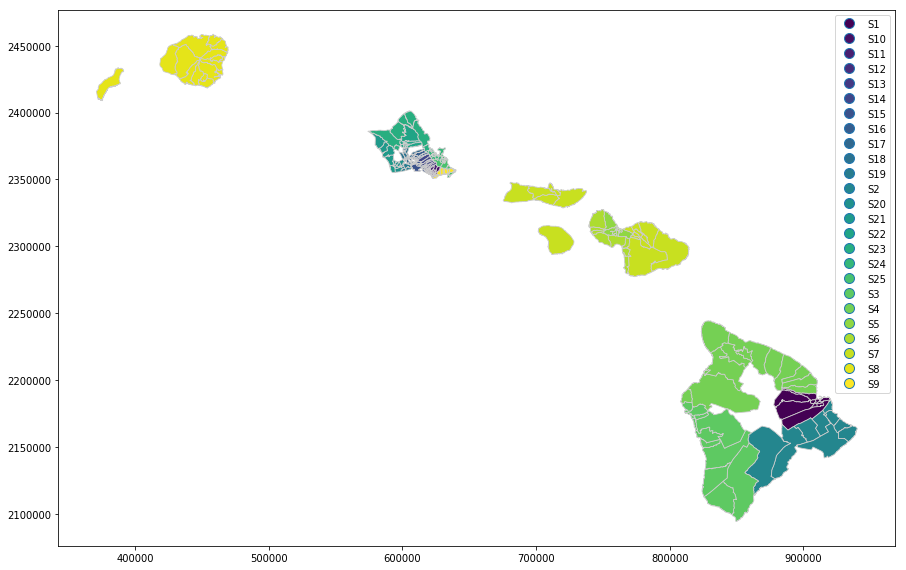

In [73]:
# >>> Categorical map of State_Senate

fig,ax = plt.subplots(figsize=(15,10))
merged.plot(column='State_Sena', 
            categorical = True, 
            linewidth=0.8, edgecolor='0.8',
            cmap ='viridis',
            ax=ax, legend=True)




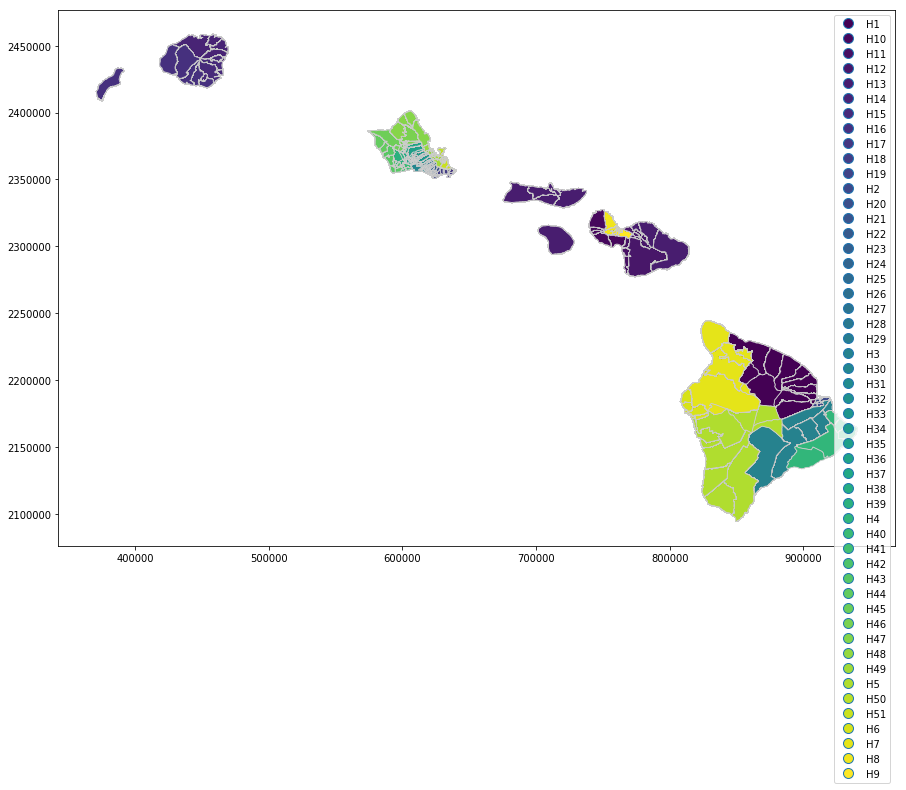

In [45]:
# >>> Categorical map of State House 

fig,ax = plt.subplots(figsize=(15,10))
merged.plot(column='State_Hous', 
            categorical = True, 
            linewidth=0.8, edgecolor='0.8',
            cmap ='viridis',
            ax=ax, legend=True)